## RANVIR SINGH
### Exploratory Data Analysis - Retail
#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
#Importing All Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported...')

Libraries imported...


In [2]:
#Reading Dataset
store = pd.read_csv("SampleSuperstore.csv")

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***Data Analysis***

In [4]:
store.shape

(9994, 13)

In [5]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
store.duplicated().sum()

17

In [10]:
store=store.drop_duplicates()

In [11]:
Store = store.drop(['Postal Code'],axis=1)

In [12]:
Store.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***Exploratory Data Analysis***

In [13]:
cor=Store.corr()
cor

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


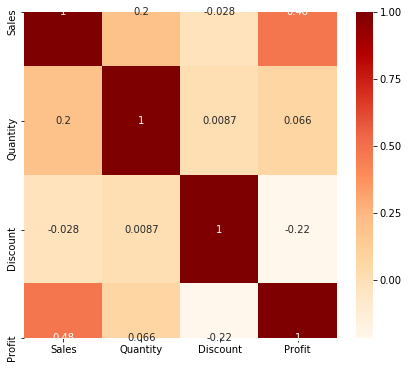

In [14]:
plt.figure(figsize=(7,6))
sns.heatmap(cor,cmap='OrRd',annot=True)

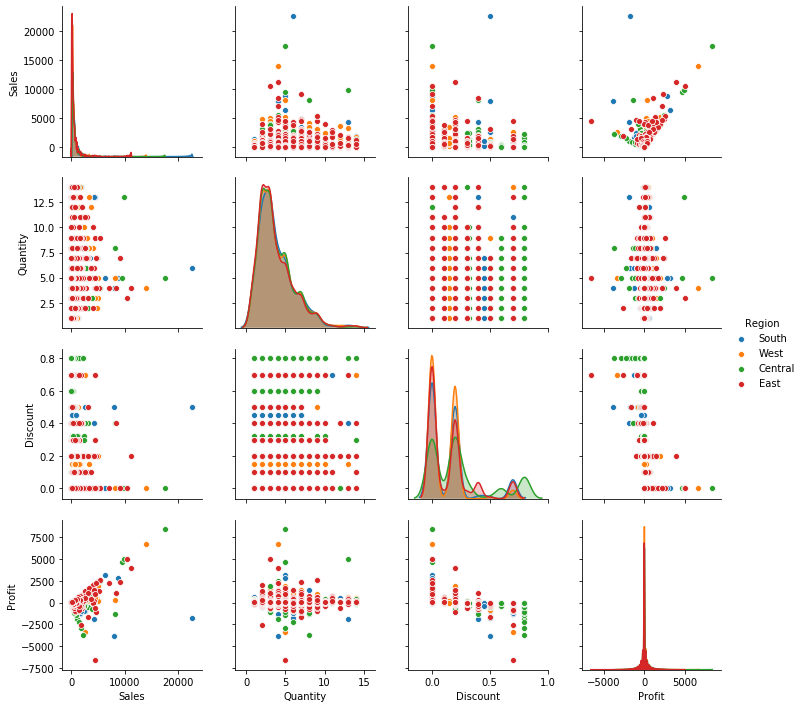

In [15]:
sns.pairplot(data=Store,hue='Region')

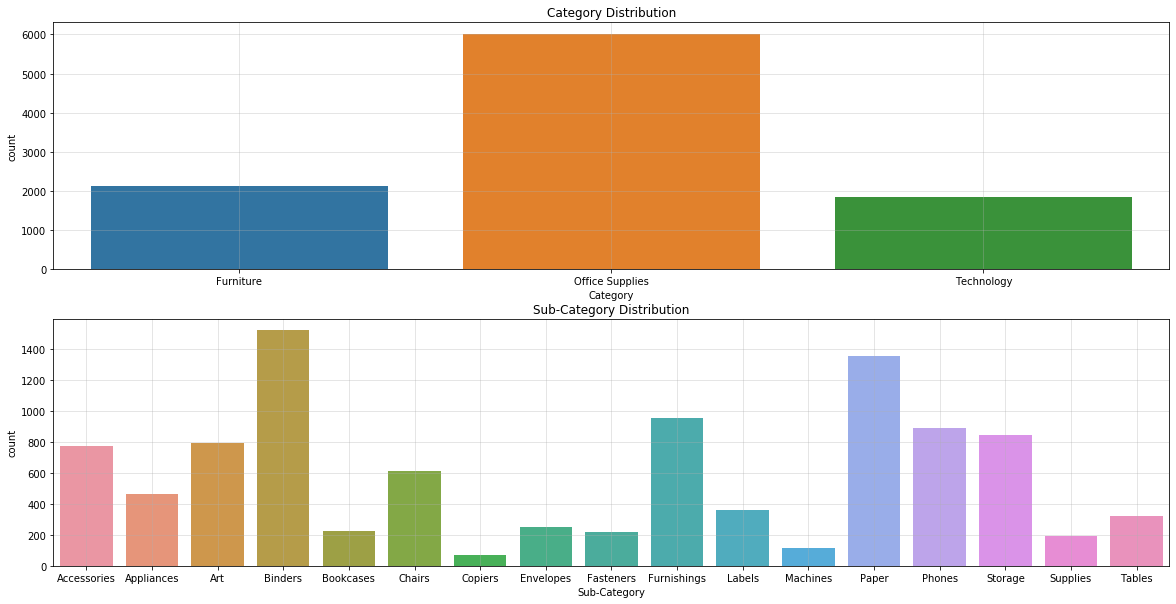

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('Category',data=Store)
plt.title('Category Distribution')
plt.grid(alpha=0.4)
plt.subplot(2,1,2)
Store2=Store.sort_values('Sub-Category')
sns.countplot('Sub-Category',data=Store2)
plt.title('Sub-Category Distribution')
plt.grid(alpha=0.4)

In [17]:
Store['State'].value_counts().head(7)

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Illinois         491
Ohio             468
Name: State, dtype: int64

In [18]:
Store_s=Store.groupby(['State'])[['Sales','Discount','Profit']].mean()
Store_s.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [19]:
Store_1 = Store_s.sort_values('Profit')

***State Wise Analysis***

<Figure size 1800x1440 with 0 Axes>

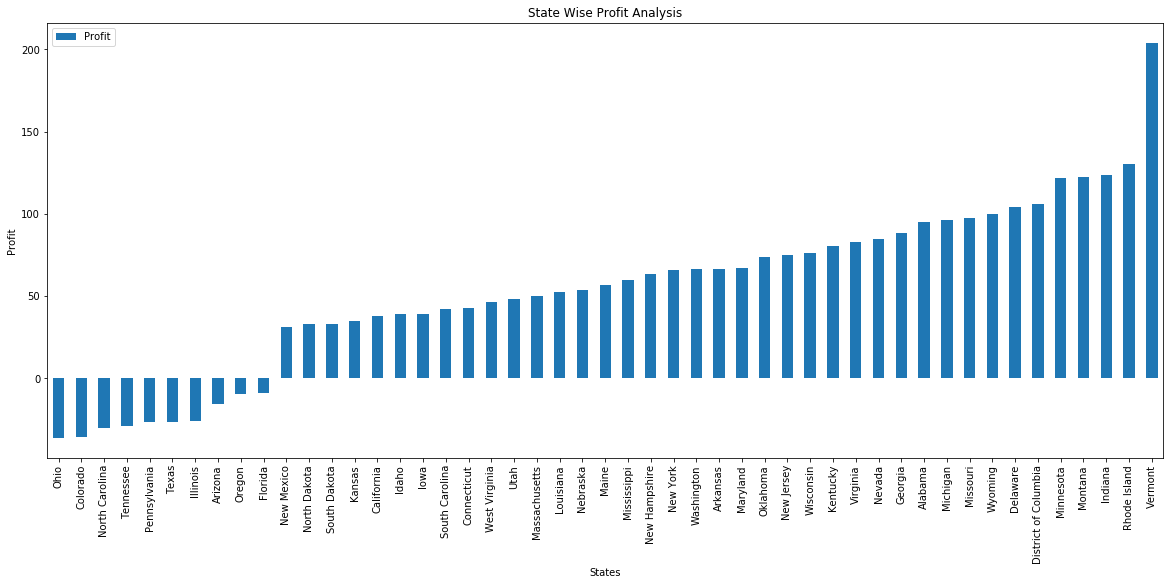

<Figure size 1800x1440 with 0 Axes>

In [20]:
Store_1[['Profit']].plot(kind='bar',figsize=(20,8))
plt.title('State Wise Profit Analysis')
plt.ylabel('Profit')
plt.xlabel('States')
plt.figure(figsize=(25,20))

Text(0.5, 1.0, 'State Wise Analysis of Sale')

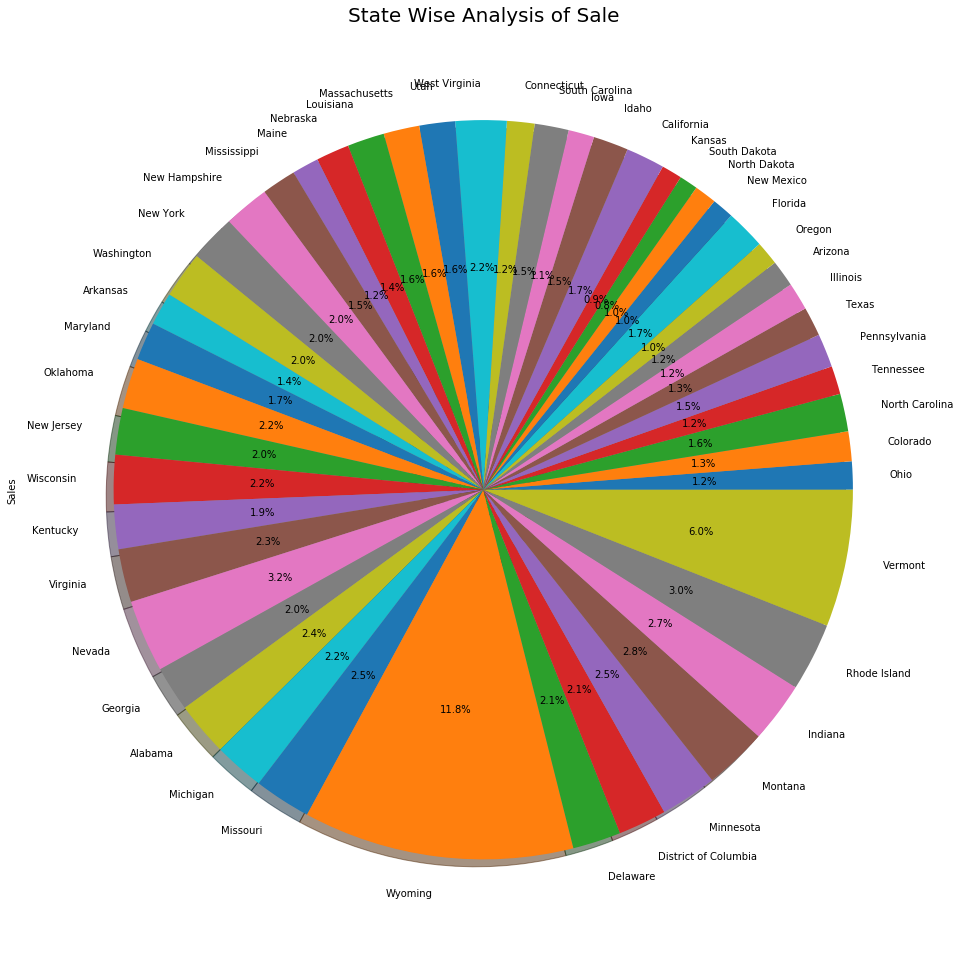

In [32]:
Store_1['Sales'].plot(kind='pie',figsize=(17,17),autopct='%1.1f%%',startangle=0,shadow=True)
plt.title('State Wise Analysis of Sale',fontsize=20)

Text(0.5, 1.0, 'State Wise Discount Analysis')

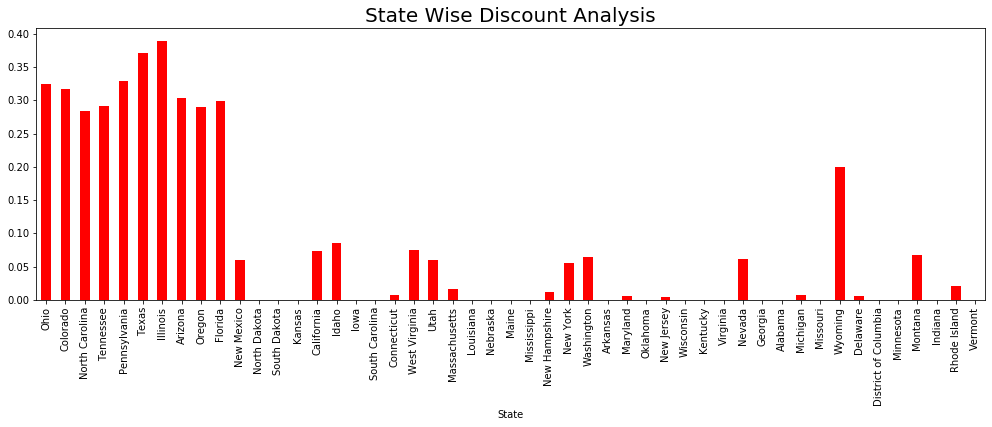

In [22]:
Store_1['Discount'].plot(kind='bar',figsize=(17,5),color='r')
plt.title('State Wise Discount Analysis',fontsize=20)

***Region Wise Analysis***

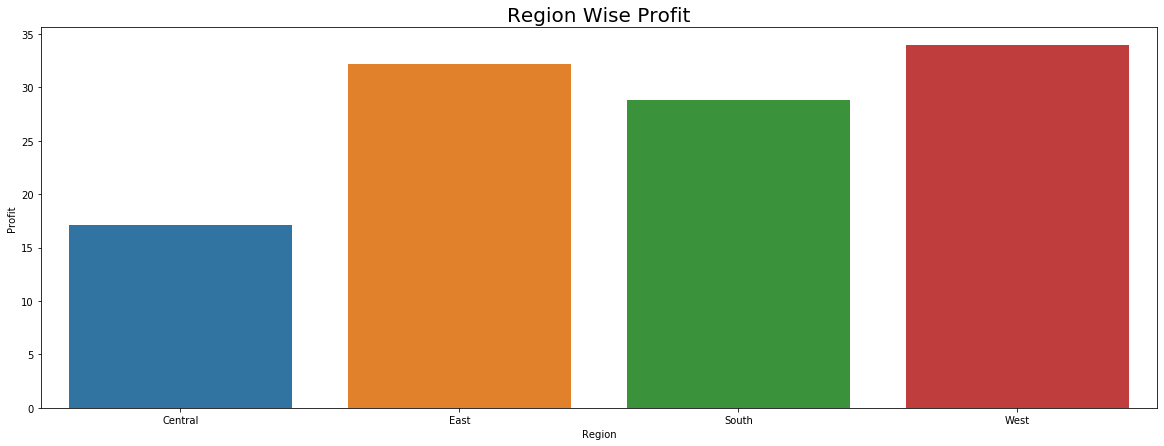

In [23]:
region_p = Store[['Profit','Region']].groupby(by='Region').mean()
plt.figure(figsize=(20,7))
plt.title('Region Wise Profit',fontsize=20)
sns.barplot(x=region_p.index,y=region_p.Profit,data=region_p)

In [24]:
Store['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000220651D7048>,
      dtype=object)

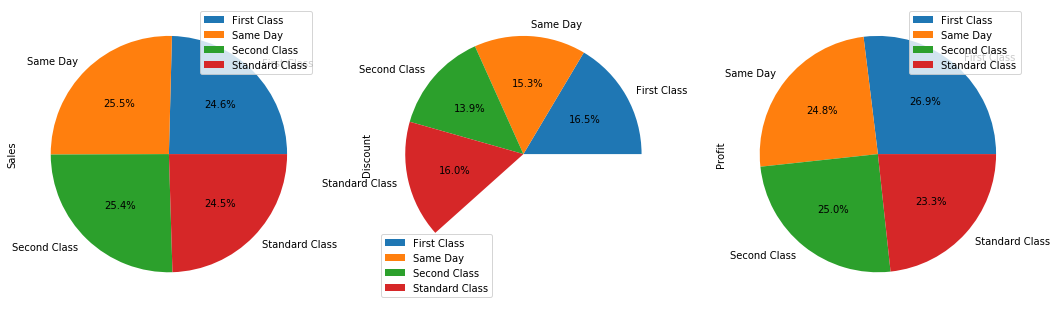

In [25]:
Store_2 = Store.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
Store_2.plot.pie(subplots=True,figsize=(18,20),autopct='%1.1f%%', labels=Store_2.index)

***Category Wise Analysis***

In [26]:
Store['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [27]:
Store_3 = Store.groupby(['Category'])[['Sales','Discount','Profit']].mean()
Store_3

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000220654448C8>,
      dtype=object)

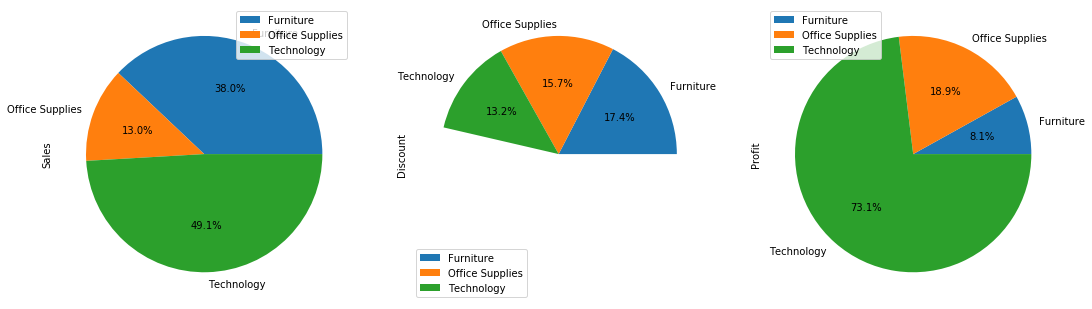

In [28]:
Store_3.plot(kind='pie',subplots=True,figsize=(18,20),autopct='%1.1f%%',labels=Store_3.index)

### CONCLUSION :

***1. Profits are Minimum in Furniture***

***2. State Wise, Lowest Profit: Ohio ,Highest Profit: Vermount***
      
***3. Region Wise Profit, Lowest:Central, Highest:       Western***

***4. Profits & Discounts in First Class are higher than others.***

***5. In Segment, Home-Office has high sale & Profit.***

***6. In Sub-Category, Copier:High Profit & Sale
Binder,Machine: High Discount***